# 성별, 웃음여부 CNN 실습
- https://www.tensorflow.org/datasets/catalog/celeb_a

In [ ]:
cd /content/drive/MyDrive/데이터/텐서플로우/

/content/drive/MyDrive/데이터/텐서플로우


## 데이터 준비

In [ ]:
# 1-1: npz 자료를 불러와서 데이터 구성요소 확인
import numpy as np
loadnpz= np.load('./data_celeba.npz')
list(loadnpz)

['X_data', 'Y_data']

In [ ]:
# 1-2: npz자료의 X_data는 X변수에 Y_data는 y변수에 할당하고 행열 개수 확인
X = loadnpz['X_data']
y = loadnpz['Y_data']
# X = data[list(data)[0]]; y = data[list(data)[1]]
print(X.shape, y.shape)

(2000, 72, 59, 3) (2000, 2)


In [ ]:
# 1-3: y값은 성별과 웃음여부로 구성되어 있음. (1,0)이면 남자이며 웃지않는 사진임
y_gender = y[:,0] # 성별자료, 0: 여자, 1: 남자
y_smile = y[:,1] # 웃음여부, 0: 웃지않음, 1: 웃음

성별:여(0)남(1) / 웃음여부:웃음x(0)웃음(1)


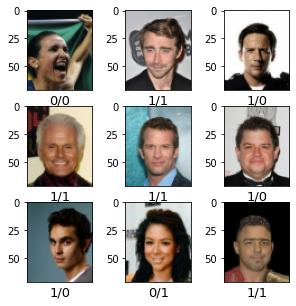

In [ ]:
# 2-1: 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
print('성별:여(0)남(1) / 웃음여부:웃음x(0)웃음(1)')
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(X[i])
    plt.xticks([])
    plt.xlabel(f'{y_gender[i]}/{y_smile[i]}', size=13)
plt.show()

-----x값-----


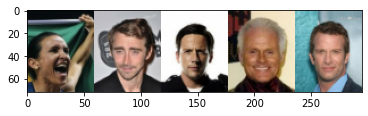

-----y값-----
[0 1 1 1 1] [0 1 0 1 1]


In [ ]:
# 5개의 이미지를 수평으로 나란히 출력
print('-----x값-----')
plt.imshow(np.hstack(X[:5]))
plt.show()

print('-----y값-----')
print(y_gender[:5], y_smile[:5])

In [ ]:
# 2-2
print(np.min(X), np.max(X)) # 스케일링된 자료
print(np.unique(y_gender))
print(np.unique(y_smile))

0.0 1.0
[0 1]
[0 1]


In [ ]:
# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_test, y_train, y_test = train_test_split(X, y_gender, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_test.shape, len(y_test))

(1400, 72, 59, 3) 1400
(600, 72, 59, 3) 600


In [ ]:
# 원자료의 자료 분포
print(np.unique(y_gender, return_counts=True))

(array([0, 1], dtype=int8), array([1006,  994]))


In [ ]:
# 과연 y데이터의 분할은 편향없이 잘 되었나 확인
# 훈련(트레이닝)과 테스트 자료에 0과 1의 분포가 비슷한가
print(len(y_train[y_train == 0]), len(y_train[y_train == 1]))
print(len(y_test[y_test == 0]), len(y_test[y_test == 1]))

726 674
280 320


In [ ]:
import collections
print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({0: 726, 1: 674})
Counter({1: 320, 0: 280})


In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1], dtype=int8), array([726, 674]))
(array([0, 1], dtype=int8), array([280, 320]))


## 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (72, 59, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax')) # 2개의 출력을 가지는 신경망

In [ ]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

## 모델 학습하기

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_test, y_test))

Epoch 1/30
44/44 [==============================] - 40s 893ms/step - loss: 0.6675 - acc: 0.5664 - val_loss: 0.5983 - val_acc: 0.7283
Epoch 2/30
44/44 [==============================] - 39s 883ms/step - loss: 0.5594 - acc: 0.7179 - val_loss: 0.5232 - val_acc: 0.7517
Epoch 3/30
44/44 [==============================] - 39s 890ms/step - loss: 0.4980 - acc: 0.7600 - val_loss: 0.4954 - val_acc: 0.7917
Epoch 4/30
44/44 [==============================] - 39s 884ms/step - loss: 0.4760 - acc: 0.7729 - val_loss: 0.4798 - val_acc: 0.7850
Epoch 5/30
44/44 [==============================] - 39s 882ms/step - loss: 0.4320 - acc: 0.8086 - val_loss: 0.4539 - val_acc: 0.7850
Epoch 6/30
44/44 [==============================] - 39s 886ms/step - loss: 0.3970 - acc: 0.8350 - val_loss: 0.4796 - val_acc: 0.7650
Epoch 7/30
44/44 [==============================] - 39s 885ms/step - loss: 0.3670 - acc: 0.8457 - val_loss: 0.4745 - val_acc: 0.7700
Epoch 8/30
44/44 [==============================] - 39s 885ms/step - 

- model.fit할 때 검증용 데이터 사용법 3가지<br>
방법1) validation_data = (x_test, y_test)데이터 분할 명령에서 만들어진 테스트 데이터를 넣음, 주로 사용됨<br>
방법2) validation_split = 0.2해서 트레이닝의 일부분을 넣음<br>
방법3) validation_data = (x_val, y_val)별도로 작성된 검증용 데이터 셋을 넣음

## 학습과정 그리기

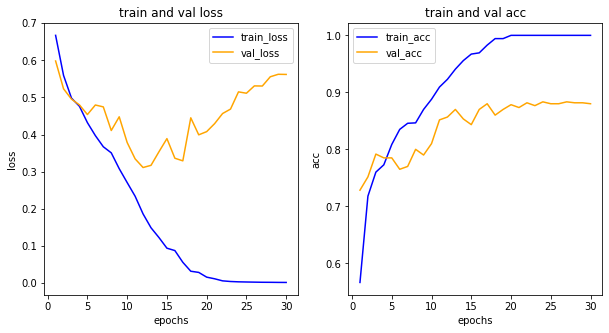

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 예측

---x테스트---


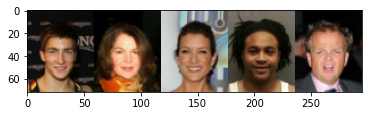

---y test value----
[1 0 0 1 1]
---y 예측값 value
1 male
0 female
0 female
1 male
1 male


In [ ]:
# 테스트데이터셋

y_pred=model.predict(x_test[:5])

print('---x테스트---')
plt.imshow(np.hstack(x_test[:5]))
plt.show()

print('---y test value----')
print(y_test[:5])

class_names=['female','male']
print('---y 예측값 value')
for i in y_pred:
  print(np.argmax(i),class_names[np.argmax(i)])

In [61]:
# model.predict(x_test[0]) 에러
model.predict(x_test[0:1]) # 텐서 모델은 4차원이어야 함.
np.shape(x_test[0]), np.shape(x_test[0:1])

((72, 59, 3), (1, 72, 59, 3))

In [64]:
# 사진을 불러와서 모델 예측을 하려면 이 작업에서 필요한 전처리
# 1. 리사이즈(높이가 72, 너비가 59)
# 2. 반드시 3채널이어야 함.(컬러)
# 3. 스케일링 0~1사이값으로(제공된 npz의 스케일링 방법은 스케일링을 적용한 사람만 정확하게 알 수 있음.) => 여기서는 255로 나눈 값
# 4. 텐서 입력 shape로 변경해야 함. => (72,59,3) --> (1,72,59,3)

import PIL.Image
img = PIL.Image.open('./제니.jpg')
img = img.resize((59,72)) # PIL에서는 (너비, 높이)로 나오기 때문에 텐서 input(높이, 너비)과 반대로 작업해야 함 => resize(너비, 높이)
print(np.shape(img))
imgArr = np.array(img)/255 # 스케일링

newX = imgArr.reshape(1,72,59,3) # (주의) 예측하기 위해서 4차원으로 변경
np.shape(newX)

(72, 59, 3)


(1, 72, 59, 3)

male


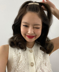

In [70]:
print(class_names[np.argmax(model.predict(newX))])
img

In [71]:
# 이 자료는 과적합 해소를 할 필요가 있음
# 모델이 잘 되면 model.save해서 h5로 갖고 다녀야 함.
# 또는 model.fit할 때 에포크 단위로 저장할 수 있도록 체크포이트 저장하면 좋음

model.save('my_gender.h5')